VD1:MinMaxScaler

In [1]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler

In [2]:
data = np.asarray([[100,0.001],
                   [8,0.005],
                   [88,0.07],
                   [4,0.1]])
print(data)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]


In [3]:
#co du lieu o tren da tao
MinMax = MinMaxScaler()

MinMax_scaled = MinMax.fit_transform(data)
MinMax_scaled

array([[1.        , 0.        ],
       [0.04166667, 0.04040404],
       [0.875     , 0.6969697 ],
       [0.        , 1.        ]])

VD2:StandardScaler


In [4]:
#co du lieu o tren da tao
Standard = StandardScaler()
Standard_scaled = Standard.fit_transform(data)
Standard_scaled

array([[ 1.13053908, -1.014789  ],
       [-0.94965283, -0.92039002],
       [ 0.8592097 ,  0.61359335],
       [-1.04009595,  1.32158567]])

VD3:Doc va bieu dien data bang hist va di danh gia mo hinh

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

path = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv'
dataset = pd.read_csv(path,header=None)
dataset.shape

(208, 61)

In [6]:
dataset.describe()


,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


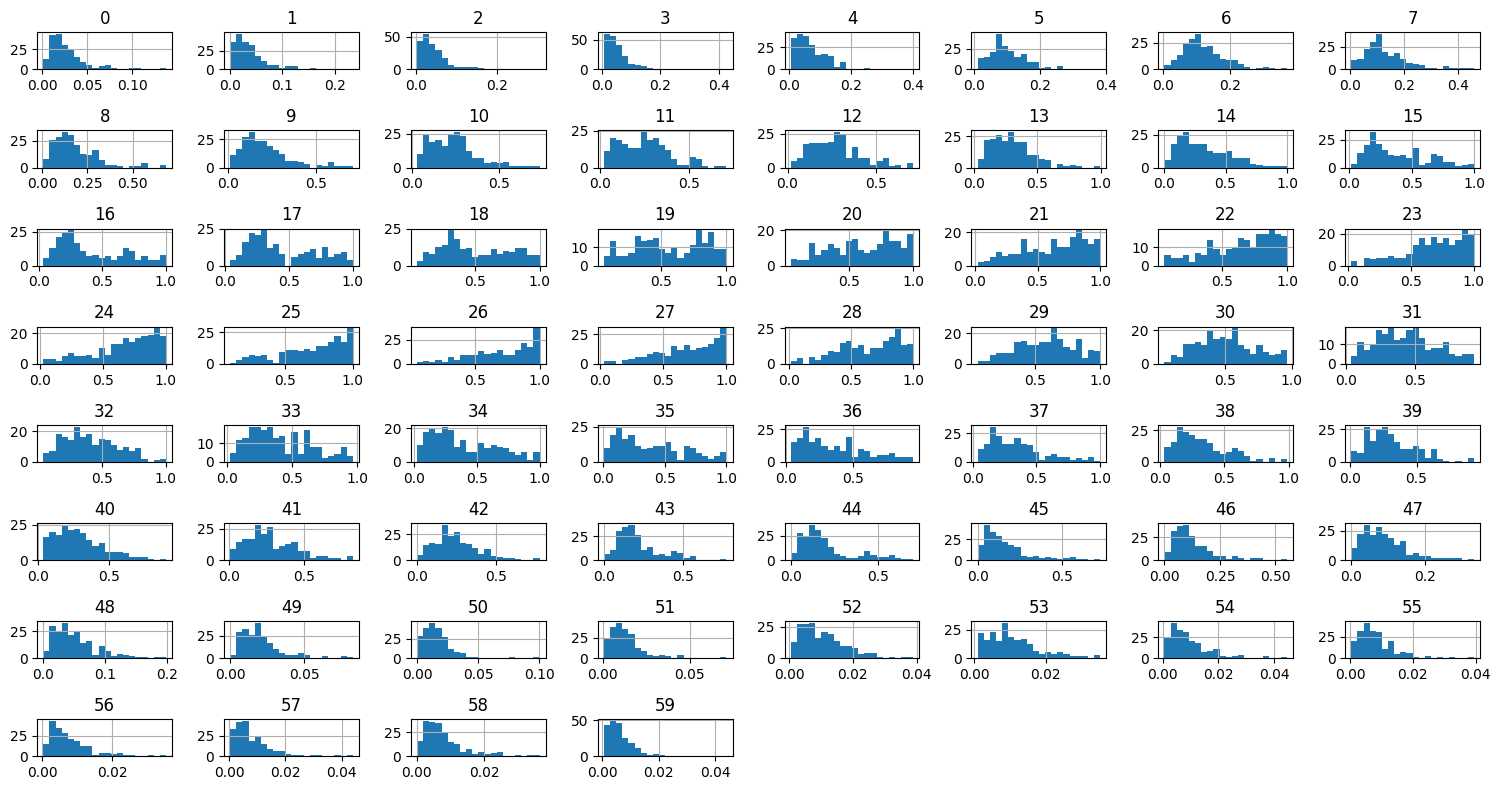

In [7]:
dataset.hist(bins=20,figsize=(15,8))
plt.tight_layout()

Danh gia mo hinh bang cross_val_score



Phan nay chi chuyen doi type cua data chu chua su dung MinMaxScaler,StandardScaler


Su dung KNeighborsClassifier de tao model

In [8]:
from sklearn.model_selection import cross_val_score,RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

data = dataset.values
X,y = data[:, :-1], data[:,-1]

X=X.astype('float32')
y=LabelEncoder().fit_transform(y.astype('str'))

model = KNeighborsClassifier()

cv = RepeatedStratifiedKFold(n_repeats=3,n_splits=10,random_state=1)
n_scores = cross_val_score(model,X,y,scoring='accuracy',cv=cv,n_jobs=1,error_score='raise')

print('Accuracy: %.3f (%.3f)'%(np.mean(n_scores),np.std(n_scores)))

Accuracy: 0.797 (0.073)


VD4:Data MinMaxScaler

In [9]:
data1 = dataset.values[: , :-1]

trans = MinMaxScaler()
data1 = trans.fit_transform(data1)
dataset1 = pd.DataFrame(data1)
dataset1

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.136431,0.156451,0.135677,0.035426,0.224956,0.237571,0.407468,0.340904,0.449282,0.285714,...,0.231076,0.027104,0.155844,0.435673,0.149660,0.417949,0.502841,0.185355,0.245179,0.060046
1,0.323009,0.221603,0.272011,0.150024,0.283033,0.666756,0.574405,0.755458,0.483045,0.394537,...,0.124502,0.108417,0.218182,0.111111,0.199546,0.479487,0.389205,0.105263,0.140496,0.087760
2,0.182153,0.246892,0.356110,0.243699,0.230028,0.585327,0.648810,0.819405,0.817859,0.869584,...,0.032869,0.319544,0.418182,0.248538,0.394558,0.615385,0.889205,0.368421,0.258953,0.166282
3,0.062684,0.070724,0.199737,0.034950,0.034999,0.071486,0.288149,0.269239,0.077447,0.164593,...,0.240040,0.161198,0.080519,0.409357,0.179138,0.176923,0.133523,0.093822,0.107438,0.256351
4,0.550885,0.282898,0.153088,0.079886,0.132640,0.147003,0.318182,0.531863,0.516659,0.621479,...,0.155378,0.032810,0.127273,0.277778,0.235828,0.028205,0.196023,0.102975,0.292011,0.203233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.126844,0.145735,0.050263,0.028293,0.082678,0.410642,0.539773,0.361411,0.333629,0.367653,...,0.202191,0.154066,0.241558,0.552632,0.061224,0.248718,0.176136,0.256293,0.528926,0.348730
204,0.227139,0.040720,0.092970,0.120304,0.175755,0.230046,0.258929,0.212348,0.141419,0.291863,...,0.050797,0.075606,0.228571,0.365497,0.129252,0.151282,0.088068,0.066362,0.168044,0.140878
205,0.373894,0.184741,0.054205,0.055635,0.072026,0.287288,0.331169,0.247630,0.175181,0.345488,...,0.154382,0.216833,0.062338,0.119883,0.126984,0.217949,0.389205,0.308924,0.209366,0.057737
206,0.212389,0.148736,0.156045,0.130766,0.025361,0.336469,0.387446,0.235502,0.276914,0.320463,...,0.041833,0.111270,0.106494,0.339181,0.068027,0.079487,0.088068,0.173913,0.096419,0.096998


In [10]:
dataset1.describe()

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.204011,0.162180,0.139068,0.114342,0.173732,0.253615,0.320472,0.285114,0.252485,0.281652,...,0.160047,0.180031,0.265172,0.290669,0.197061,0.200555,0.213642,0.175035,0.216015,0.136425
std,0.169550,0.141277,0.126242,0.110623,0.140888,0.158843,0.167175,0.187767,0.175311,0.192215,...,0.119607,0.137432,0.183385,0.213474,0.160717,0.147080,0.164361,0.148051,0.170286,0.116190
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.087389,0.067938,0.057326,0.044163,0.079508,0.152714,0.209957,0.165215,0.132571,0.142964,...,0.083914,0.092368,0.118831,0.127924,0.080499,0.102564,0.096591,0.075515,0.098485,0.057737
50%,0.157080,0.129447,0.107753,0.090942,0.141517,0.220236,0.280438,0.235061,0.214349,0.244673,...,0.138446,0.151213,0.235065,0.242690,0.156463,0.165385,0.160511,0.125858,0.173554,0.108545
75%,0.251106,0.202958,0.185447,0.139563,0.237319,0.333042,0.407738,0.361852,0.334555,0.368082,...,0.207420,0.227175,0.374026,0.394737,0.260771,0.260897,0.287642,0.229977,0.281680,0.183025
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


array([[<Axes: title={'center': '0'}>, <Axes: title={'center': '1'}>,
        <Axes: title={'center': '2'}>, <Axes: title={'center': '3'}>,
        <Axes: title={'center': '4'}>, <Axes: title={'center': '5'}>,
        <Axes: title={'center': '6'}>, <Axes: title={'center': '7'}>],
       [<Axes: title={'center': '8'}>, <Axes: title={'center': '9'}>,
        <Axes: title={'center': '10'}>, <Axes: title={'center': '11'}>,
        <Axes: title={'center': '12'}>, <Axes: title={'center': '13'}>,
        <Axes: title={'center': '14'}>, <Axes: title={'center': '15'}>],
       [<Axes: title={'center': '16'}>, <Axes: title={'center': '17'}>,
        <Axes: title={'center': '18'}>, <Axes: title={'center': '19'}>,
        <Axes: title={'center': '20'}>, <Axes: title={'center': '21'}>,
        <Axes: title={'center': '22'}>, <Axes: title={'center': '23'}>],
       [<Axes: title={'center': '24'}>, <Axes: title={'center': '25'}>,
        <Axes: title={'center': '26'}>, <Axes: title={'center': '27'}>,

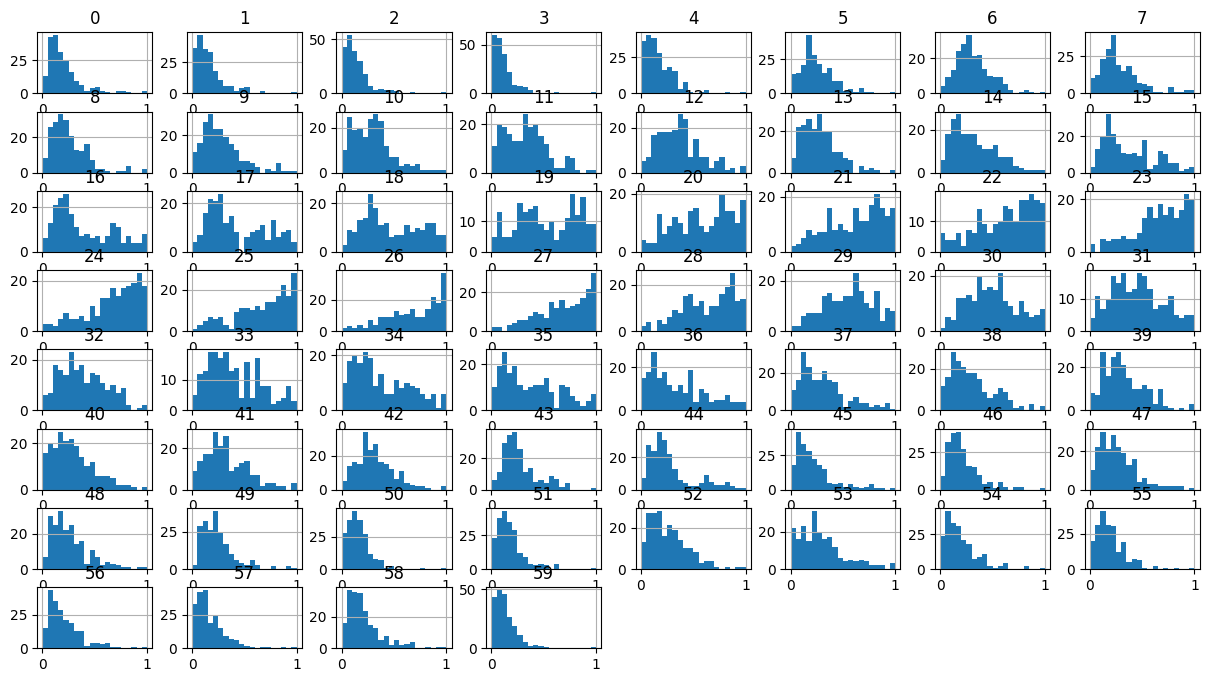

In [11]:
dataset1.hist(bins=20,figsize=(15,8))

VD5:Danh gia mo hinh KNN bang  MinMaxScaler


In [12]:
from sklearn.pipeline import Pipeline

#Phan nay phai co them cat va chuyen type du lieu nhung da lam o tren nen khong can viet lai

trans = MinMaxScaler()
model = KNeighborsClassifier()
pipleline = Pipeline(steps=[('t',trans), ('m',model)])

cv = RepeatedStratifiedKFold(n_repeats=3,n_splits=10,random_state=1)
n_scores = cross_val_score(pipleline,X,y,scoring='accuracy',cv=cv,n_jobs=1,error_score='raise')

print('Accuracy: %.3f (%.3f)'%(np.mean(n_scores),np.std(n_scores)))


Accuracy: 0.813 (0.085)


VD6:Danh gia mo hinh KNN bang  StandardScaler

In [13]:
#Phan nay phai co them cat va chuyen type du lieu nhung da lam o tren nen khong can viet lai

trans = StandardScaler()
model = KNeighborsClassifier()
pipleline = Pipeline(steps=[('t',trans), ('m',model)])

cv = RepeatedStratifiedKFold(n_repeats=3,n_splits=10,random_state=1)
n_scores = cross_val_score(pipleline,X,y,scoring='accuracy',cv=cv,n_jobs=1,error_score='raise')

print('Accuracy: %.3f (%.3f)'%(np.mean(n_scores),np.std(n_scores)))

Accuracy: 0.810 (0.080)
